# Importing Liabraries


In [85]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn import ensemble


# Importing or Openeing Datasets

In [86]:
df = pd.read_csv('/content/drive/MyDrive/FYP Dataset Final/dengue_features_train.csv')

In [87]:
df_labels = pd.read_csv('/content/drive/MyDrive/FYP Dataset Final/dengue_labels_train.csv')

# Merging the labels

In [88]:
combined_df = pd.merge(df, df_labels, on=['city', 'year', 'weekofyear'])

In [89]:
combined_df

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,iq,2010,21,2010-05-28,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,...,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0,5
1452,iq,2010,22,2010-06-04,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,...,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6,8
1453,iq,2010,23,2010-06-11,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,...,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4,1
1454,iq,2010,24,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,...,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0,1


# Seperating data based upon on cities

In [90]:
sj_data = combined_df[combined_df['city'] == 'sj']
iq_data = combined_df[combined_df['city'] == 'iq']

In [91]:
sj_data = sj_data.drop('city', axis=1)

In [92]:
iq_data = iq_data.drop('city', axis=1)

In [93]:
iq_data = iq_data.drop('week_start_date', axis=1)
sj_data = sj_data.drop('week_start_date', axis=1)


# Finding Pearson Correlation

In [94]:
sj_correlation_matrix = sj_data.corr(method='pearson')
iq_correlation_matrix = iq_data.corr(method='pearson')



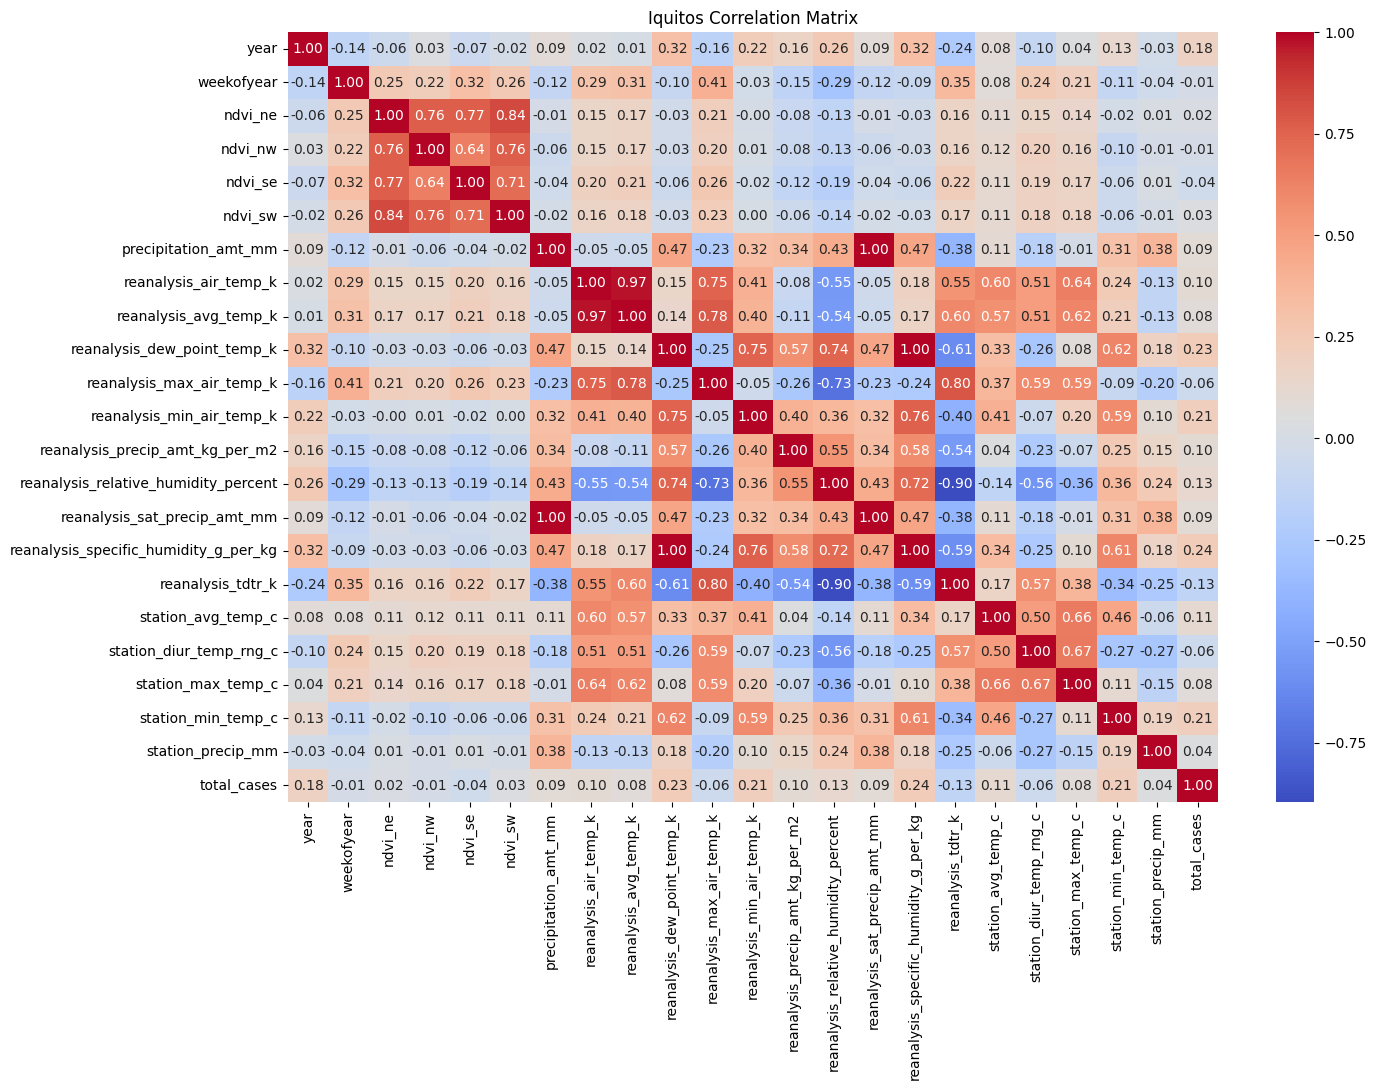

In [95]:
plt.figure(figsize=(15, 10))
sns.heatmap(iq_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Iquitos Correlation Matrix")
plt.show()

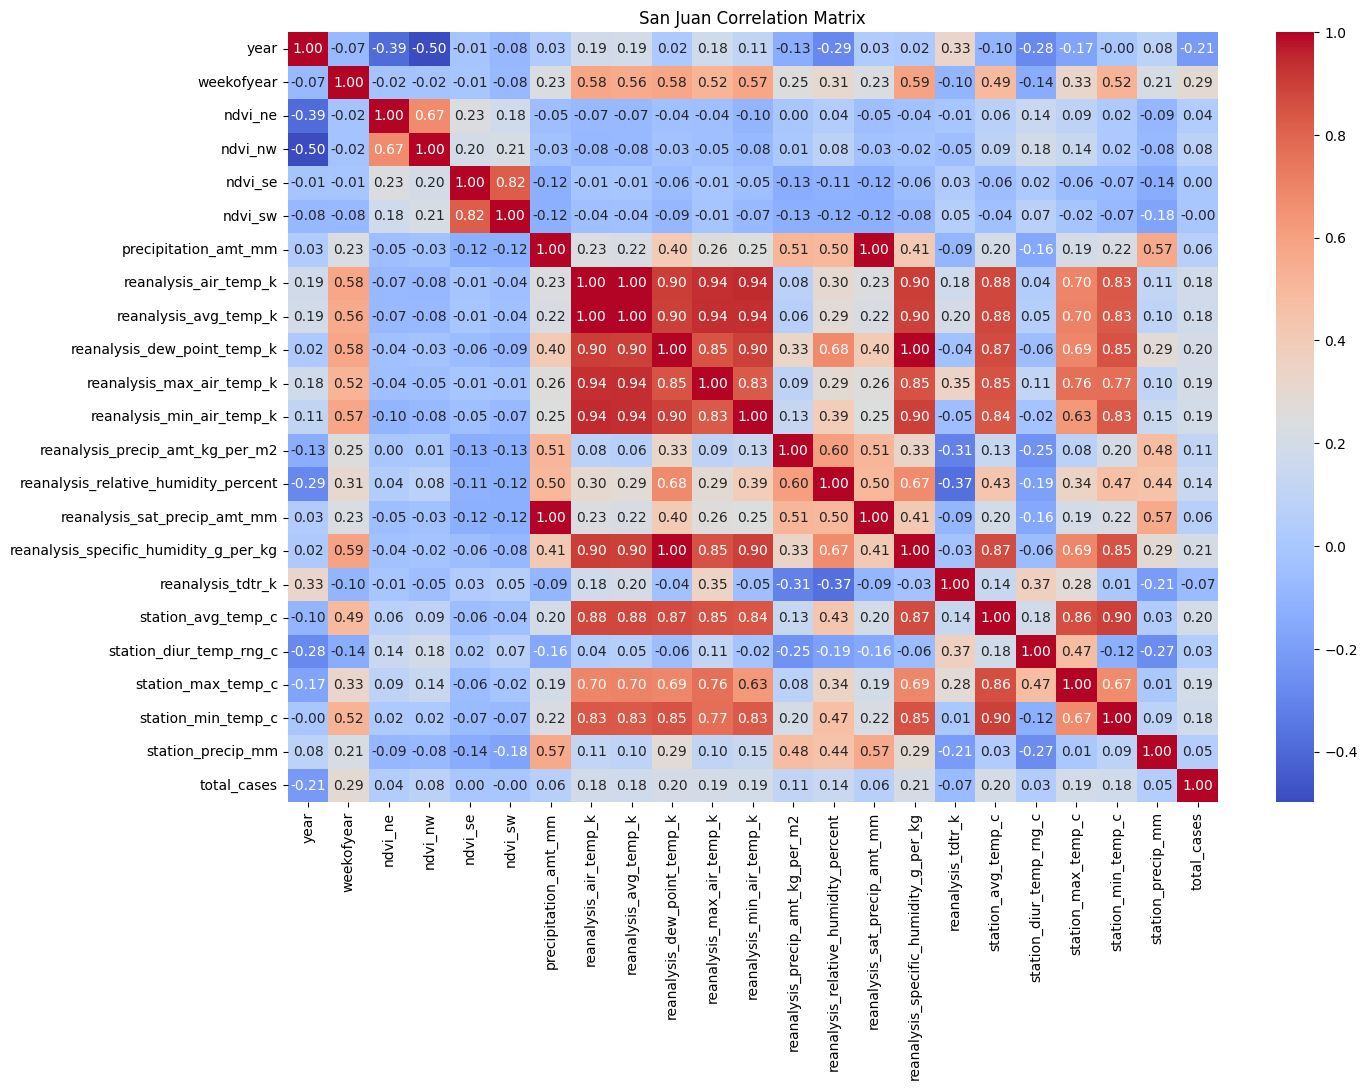

In [96]:
plt.figure(figsize=(15, 10))
sns.heatmap(sj_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("San Juan Correlation Matrix")
plt.show()


# Dropping the unwanted coloumns

In [97]:
sj_data = sj_data.drop('ndvi_ne', axis=1)
sj_data = sj_data.drop('ndvi_nw', axis=1)
sj_data = sj_data.drop('ndvi_se', axis=1)
sj_data = sj_data.drop('ndvi_sw', axis=1)



sj_data = sj_data.drop('precipitation_amt_mm', axis=1)
sj_data = sj_data.drop('reanalysis_air_temp_k', axis=1)
sj_data = sj_data.drop('reanalysis_max_air_temp_k', axis=1)
sj_data = sj_data.drop('reanalysis_min_air_temp_k', axis=1)


sj_data = sj_data.drop('reanalysis_precip_amt_kg_per_m2', axis=1)
sj_data = sj_data.drop('reanalysis_relative_humidity_percent', axis=1)
sj_data = sj_data.drop('reanalysis_sat_precip_amt_mm', axis=1)
sj_data = sj_data.drop('reanalysis_tdtr_k', axis=1)
sj_data = sj_data.drop('station_diur_temp_rng_c', axis=1)
sj_data = sj_data.drop('reanalysis_avg_temp_k', axis=1)




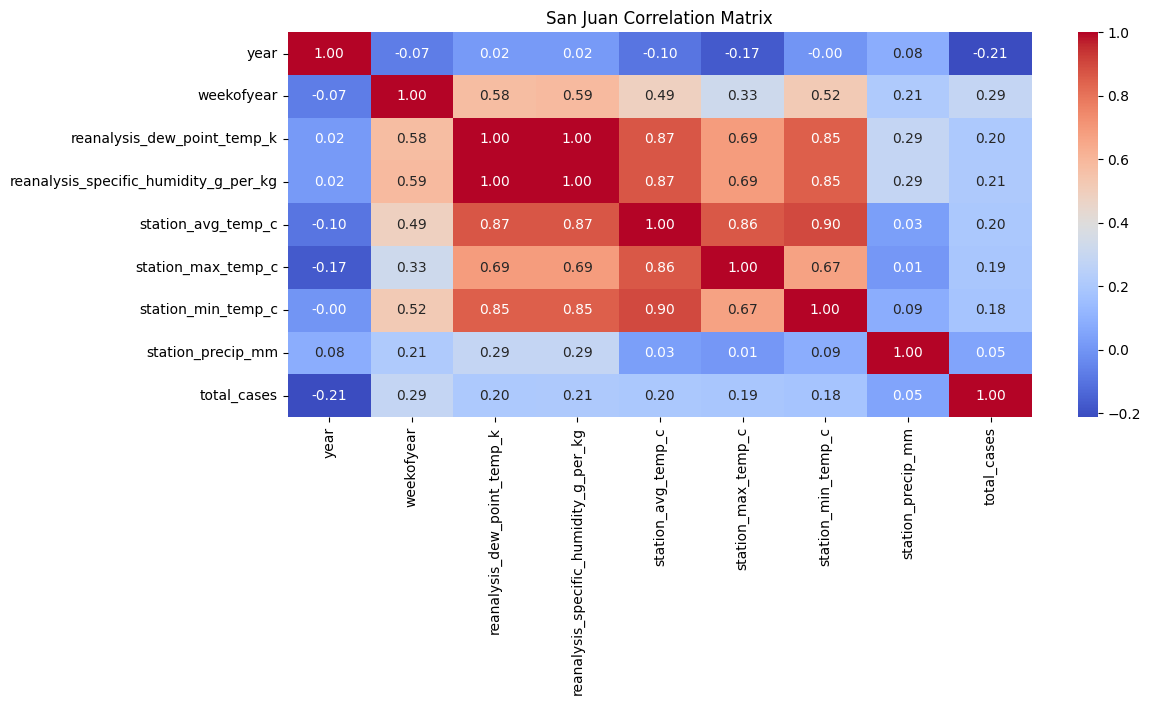

In [98]:
sj_correlation_matrix = sj_data.corr(method='pearson')

plt.figure(figsize=(12, 5))
sns.heatmap(sj_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("San Juan Correlation Matrix")
plt.show()





In [99]:
iq_data = iq_data.drop('ndvi_ne', axis=1)
iq_data = iq_data.drop('ndvi_nw', axis=1)
iq_data = iq_data.drop('ndvi_se', axis=1)
iq_data = iq_data.drop('ndvi_sw', axis=1)



iq_data = iq_data.drop('precipitation_amt_mm', axis=1)
iq_data = iq_data.drop('reanalysis_air_temp_k', axis=1)
iq_data = iq_data.drop('reanalysis_max_air_temp_k', axis=1)
iq_data = iq_data.drop('reanalysis_min_air_temp_k', axis=1)


iq_data = iq_data.drop('reanalysis_precip_amt_kg_per_m2', axis=1)
iq_data = iq_data.drop('reanalysis_relative_humidity_percent', axis=1)
iq_data = iq_data.drop('reanalysis_sat_precip_amt_mm', axis=1)
iq_data = iq_data.drop('reanalysis_tdtr_k', axis=1)
iq_data = iq_data.drop('station_diur_temp_rng_c', axis=1)
iq_data = iq_data.drop('reanalysis_avg_temp_k', axis=1)




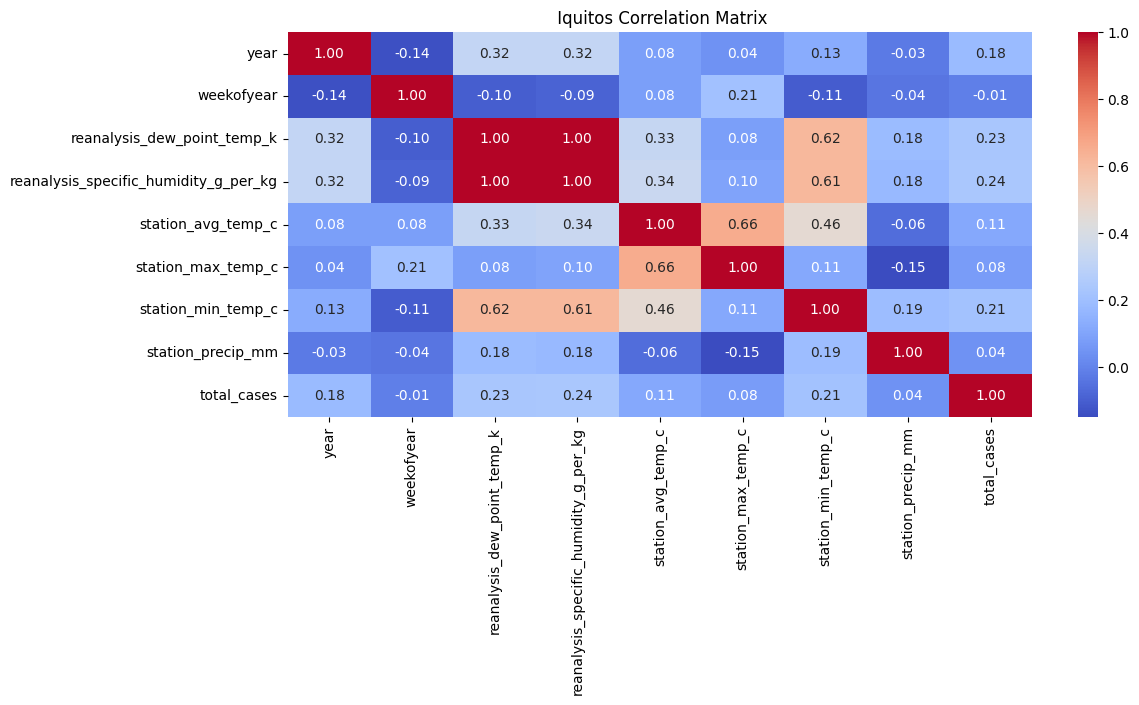

In [100]:
iq_correlation_matrix = iq_data.corr(method='pearson')

plt.figure(figsize=(12, 5))
sns.heatmap(iq_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title(" Iquitos Correlation Matrix")
plt.show()


# Preprocessing -> Filling NA values

In [101]:
ProcessedData = sj_data.apply(lambda x: x.fillna(method='ffill'))

<ipython-input-101-5faf2e6f367d>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ProcessedData = sj_data.apply(lambda x: x.fillna(method='ffill'))


# Converting Kelvin into Celcius

In [102]:
c=["reanalysis_dew_point_temp_k"]

for i in c:
    ProcessedData[i] = ProcessedData[i] - 273.15

In [103]:
ProcessedData

,year,weekofyear,reanalysis_dew_point_temp_k,reanalysis_specific_humidity_g_per_kg,station_avg_temp_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,1990,18,19.264286,14.012857,25.442857,29.4,20.0,16.0,4
1,1990,19,20.801429,15.372857,26.714286,31.7,22.2,8.6,5
2,1990,20,22.284286,16.848571,26.714286,32.2,22.8,41.4,4
3,1990,21,22.160000,16.672857,27.471429,33.3,23.3,4.0,3
4,1990,22,22.671429,17.210000,28.942857,35.0,23.9,5.8,6
...,...,...,...,...,...,...,...,...,...
931,2008,13,18.945714,13.644286,25.042857,30.0,21.1,1.8,4
932,2008,14,20.085714,14.662857,26.242857,30.6,22.2,0.5,3
933,2008,15,19.582857,14.184286,25.000000,29.4,21.7,30.7,1
934,2008,16,19.124286,13.858571,25.314286,29.4,21.7,11.2,3


In [104]:
# prompt: coloumn names

print(ProcessedData.columns)

Index(['year', 'weekofyear', 'reanalysis_dew_point_temp_k',
       'reanalysis_specific_humidity_g_per_kg', 'station_avg_temp_c',
       'station_max_temp_c', 'station_min_temp_c', 'station_precip_mm',
       'total_cases'],
      dtype='object')


# Variance

In [105]:
for index in list(ProcessedData):
    print(index,"-->",ProcessedData[index].var())

year --> 27.165734265734436
weekofyear --> 225.6577437268615
reanalysis_dew_point_temp_k --> 2.465136099567736
reanalysis_specific_humidity_g_per_kg --> 2.435668323547452
station_avg_temp_c --> 2.002448106284689
station_max_temp_c --> 2.955285159285154
station_min_temp_c --> 2.2688839526486535
station_precip_mm --> 856.3846162987347
total_cases --> 2640.045439691045


# Filling the NA values on cases coloumn by taking mean

In [106]:
iq_data['total_cases'].fillna((iq_data['total_cases'].mean()), inplace=True)
sj_data['total_cases'].fillna((sj_data['total_cases'].mean()), inplace=True)

<ipython-input-106-1fa3774ea52e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  iq_data['total_cases'].fillna((iq_data['total_cases'].mean()), inplace=True)
<ipython-input-106-1fa3774ea52e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(v

# Setting up the lag by one and two weeks on IQ Dataset

In [107]:
iq_data = iq_data.assign(Lag_by_1_Week=iq_data['total_cases'].shift(-1))
iq_data = iq_data.apply(lambda x: x.fillna(method='ffill'))
iq_data['Lag_by_1_Week'] = iq_data['Lag_by_1_Week'].astype(int)

<ipython-input-107-8f16059dcc01>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  iq_data = iq_data.apply(lambda x: x.fillna(method='ffill'))


In [108]:
iq_data = iq_data.assign(Lag_by_2_Weeks=iq_data['total_cases'].shift(-2))
iq_data = iq_data.apply(lambda x: x.fillna(method='ffill'))
iq_data['Lag_by_2_Weeks'] = iq_data['Lag_by_2_Weeks'].astype(int)

<ipython-input-108-3f18beb36b4e>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  iq_data = iq_data.apply(lambda x: x.fillna(method='ffill'))


In [109]:
iq_data

,year,weekofyear,reanalysis_dew_point_temp_k,reanalysis_specific_humidity_g_per_kg,station_avg_temp_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,Lag_by_1_Week,Lag_by_2_Weeks
936,2000,26,295.184286,16.651429,26.400000,32.5,20.7,3.0,0,0,0
937,2000,27,295.358571,16.862857,26.900000,34.0,20.8,55.6,0,0,0
938,2000,28,295.622857,17.120000,26.800000,33.0,20.7,38.1,0,0,0
939,2000,29,292.797143,14.431429,25.766667,31.5,14.7,30.0,0,0,0
940,2000,30,293.957143,15.444286,26.600000,33.3,19.1,4.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1451,2010,21,296.825714,18.485714,28.633333,35.4,22.4,27.0,5,8,1
1452,2010,22,296.452857,18.070000,27.433333,34.7,21.7,36.6,8,1,1
1453,2010,23,295.501429,17.008571,24.400000,32.2,19.2,7.4,1,1,4
1454,2010,24,295.324286,16.815714,25.433333,31.2,21.0,16.0,1,4,4


# Setting up Lag for one and two weeks on SJ dataset

In [110]:
sj_data = sj_data.assign(Lag_by_1_Week=sj_data['total_cases'].shift(-1))
sj_data = sj_data.apply(lambda x: x.fillna(method='ffill'))
sj_data['Lag_by_1_Week'] = sj_data['Lag_by_1_Week'].astype(int)

<ipython-input-110-bcf72a4e0626>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  sj_data = sj_data.apply(lambda x: x.fillna(method='ffill'))


In [111]:
sj_data = sj_data.assign(Lag_by_2_Weeks=sj_data['total_cases'].shift(-2))
sj_data = sj_data.apply(lambda x: x.fillna(method='ffill'))
sj_data['Lag_by_2_Weeks'] = sj_data['Lag_by_2_Weeks'].astype(int)

<ipython-input-111-eec041dfd70a>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  sj_data = sj_data.apply(lambda x: x.fillna(method='ffill'))


# Splitting the Train and Test data for Iq

In [113]:
IQ_X=iq_data.iloc[:,:-3]
IQ_Y=iq_data.iloc[:,-2:-1]

In [114]:
IQ_X_Train, IQ_X_Test, IQ_Y_Train, IQ_Y_Test = train_test_split(IQ_X, IQ_Y, test_size = 0.2)


# Standardizing

In [115]:
scaler = StandardScaler()

scaler.fit(IQ_X_Train)

StandardScaler()

# Applying Gradient Boosting for IQ


In [ ]:
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'squared_error'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(IQ_X_Train, IQ_Y_Train)
IQ_Predicted_Gradient_Boosting = clf.predict(IQ_X_Test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


In [ ]:
IQ_result_MSE_Gradient_Boosting = math.sqrt(mean_squared_error(IQ_Y_Test, IQ_Predicted_Gradient_Boosting))


In [ ]:
IQ_result_MSE_Gradient_Boosting


9.997017100355347

In [ ]:
IQ_result_MAE_Gradient_Boosting = mean_absolute_error(IQ_Y_Test, IQ_Predicted_Gradient_Boosting)


In [ ]:
IQ_result_MAE_Gradient_Boosting


5.623644751613697

In [ ]:
params = {'n_estimators': 500, 'max_depth': 5, 'min_samples_split': 3,
          'learning_rate': 0.01, 'loss': 'squared_error'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(IQ_X_Train, IQ_Y_Train)
IQ_Predicted_Gradient_Boosting = clf.predict(IQ_X_Test)

IQ_result_MSE_Gradient_Boosting = math.sqrt(mean_squared_error(IQ_Y_Test, IQ_Predicted_Gradient_Boosting))

IQ_result_MSE_Gradient_Boosting

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


9.829326119462227

In [ ]:
IQ_result_MAE_Gradient_Boosting = mean_absolute_error(IQ_Y_Test, IQ_Predicted_Gradient_Boosting)

IQ_result_MAE_Gradient_Boosting

5.370056880654449

In [ ]:
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'absolute_error'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(IQ_X_Train, IQ_Y_Train)
IQ_Predicted_Gradient_Boosting = clf.predict(IQ_X_Test)

IQ_result_MSE_Gradient_Boosting = math.sqrt(mean_squared_error(IQ_Y_Test, IQ_Predicted_Gradient_Boosting))

IQ_result_MSE_Gradient_Boosting

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


9.864737891322209

In [ ]:
IQ_result_MAE_Gradient_Boosting = mean_absolute_error(IQ_Y_Test, IQ_Predicted_Gradient_Boosting)

IQ_result_MAE_Gradient_Boosting

4.61555958573712

In [ ]:
params = {'n_estimators': 500, 'max_depth': 5, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'absolute_error', 'criterion':'friedman_mse'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(IQ_X_Train, IQ_Y_Train)
IQ_Predicted_Gradient_Boosting = clf.predict(IQ_X_Test)

IQ_result_MSE_Gradient_Boosting = math.sqrt(mean_squared_error(IQ_Y_Test, IQ_Predicted_Gradient_Boosting))

IQ_result_MSE_Gradient_Boosting

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


9.703653205265892

In [ ]:
IQ_result_MAE_Gradient_Boosting = mean_absolute_error(IQ_Y_Test, IQ_Predicted_Gradient_Boosting)

IQ_result_MAE_Gradient_Boosting

4.547334406228964

# Applying XGB for IQ

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [6, 8, 10],
    'learning_rate': [0.01, 0.005],
    'subsample': [0.6, 0.7, 0.8],
    'colsample_bytree': [0.6, 0.7],
    'gamma': [0.2, 0.3, 0.4],
    'reg_alpha': [0.1, 0.5],
    'reg_lambda': [1, 2, 3]
}

grid_search = GridSearchCV(
    estimator=XGBRegressor(n_estimators=1000, random_state=42),
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=1
)

# Perform grid search to find the best parameters
grid_search.fit(IQ_X_Train, IQ_Y_Train)

print(f"Best params: {grid_search.best_params_}")



Fitting 5 folds for each of 648 candidates, totalling 3240 fits
Best params: {'colsample_bytree': 0.7, 'gamma': 0.3, 'learning_rate': 0.005, 'max_depth': 6, 'reg_alpha': 0.5, 'reg_lambda': 3, 'subsample': 0.8}


In [116]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming X and y are your feature set and target variable
X_train, X_val, y_train, y_val = train_test_split(IQ_X, IQ_Y, test_size=0.2, random_state=42)

# Convert the dataset into DMatrix, which is optimized for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

# Parameters for the model
params = {
    'objective': 'reg:squarederror',  # For regression tasks
    'learning_rate': 0.005,           # Best learning rate found
    'max_depth': 6,                   # Optimal tree depth
    'subsample': 0.8,                 # Use 80% of data per boosting round
    'colsample_bytree': 0.7,          # Use 70% of features for each tree
    'gamma': 0.3,                     # Split only if gain is high enough
    'reg_alpha': 0.5,                 # L1 regularization
    'reg_lambda': 3,                  # Stronger L2 regularization
    'eval_metric': 'rmse',            # Metric for evaluation (RMSE)
    'seed': 42                        # For reproducibility
}

# Training with early stopping
evals = [(dtrain, 'train'), (dval, 'eval')]   # Evaluation set for monitoring

# Train the model with early stopping
model_IQ = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=2000,               # High number of rounds to leverage early stopping
    evals=evals,
    early_stopping_rounds=50,           # Stop if no improvement for 50 rounds
    verbose_eval=10                     # Output every 10 rounds
)

# Predict and evaluate the performance
y_pred = model_IQ.predict(dval)

# Evaluation metrics
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")


[0]	train-rmse:11.33506	eval-rmse:7.91990
[10]	train-rmse:11.15769	eval-rmse:7.82713
[20]	train-rmse:10.99518	eval-rmse:7.71861
[30]	train-rmse:10.81534	eval-rmse:7.60093
[40]	train-rmse:10.67143	eval-rmse:7.53618
[50]	train-rmse:10.49846	eval-rmse:7.40486
[60]	train-rmse:10.36428	eval-rmse:7.33809
[70]	train-rmse:10.19113	eval-rmse:7.27882
[80]	train-rmse:10.03998	eval-rmse:7.17713
[90]	train-rmse:9.89248	eval-rmse:7.11458
[100]	train-rmse:9.74366	eval-rmse:7.04058
[110]	train-rmse:9.59476	eval-rmse:6.98571
[120]	train-rmse:9.44194	eval-rmse:6.89787
[130]	train-rmse:9.31887	eval-rmse:6.84889
[140]	train-rmse:9.17705	eval-rmse:6.81625
[150]	train-rmse:9.04888	eval-rmse:6.77739
[160]	train-rmse:8.91391	eval-rmse:6.72666
[170]	train-rmse:8.78309	eval-rmse:6.67642
[180]	train-rmse:8.67706	eval-rmse:6.63883
[190]	train-rmse:8.55597	eval-rmse:6.61258
[200]	train-rmse:8.43118	eval-rmse:6.58579
[210]	train-rmse:8.32010	eval-rmse:6.56141
[220]	train-rmse:8.23706	eval-rmse:6.54510
[230]	train-r

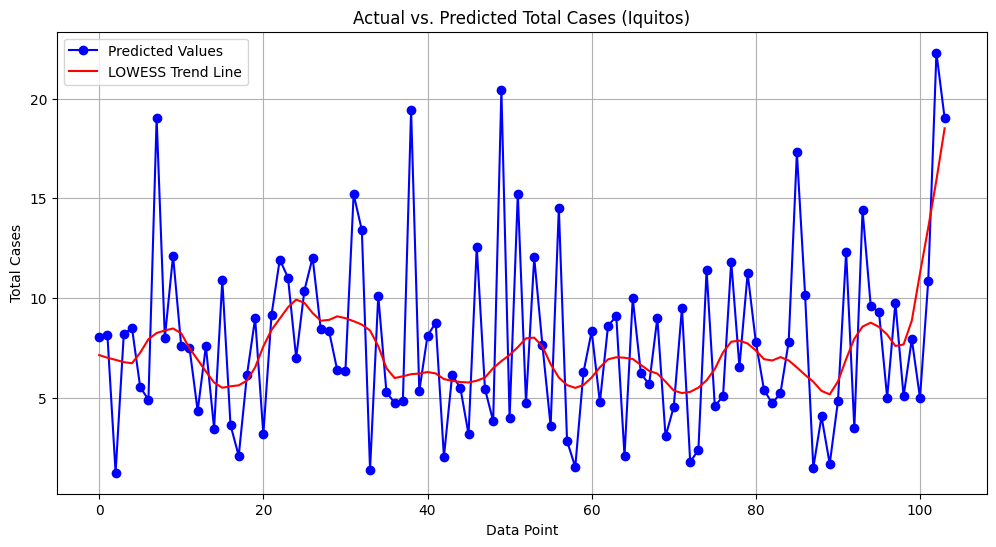

In [118]:
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

# Plot the predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_pred, label='Predicted Values', color='blue', marker='o')

# Fit a LOWESS trend line to the predicted values
lowess = sm.nonparametric.lowess(y_pred, np.arange(len(y_pred)), frac=0.1)  # frac controls the amount of smoothing

# Plot the LOWESS trend line
plt.plot(lowess[:, 0], lowess[:, 1], label='LOWESS Trend Line', color='red')

# Customize the plot
plt.xlabel('Data Point')
plt.ylabel('Total Cases')
plt.title('Actual vs. Predicted Total Cases (Iquitos)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


# Realtime API Fetch and predicting value IQ

In [159]:

import requests
import sys

import csv
import codecs
import pandas as pd


response = requests.request("GET", "https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/iquitos?unitGroup=metric&include=days&key=BLFLYSFR6ZD7GZTSNY7UBQWQU&contentType=csv")
if response.status_code!=200:
  print('Unexpected Status code: ', response.status_code)
  sys.exit()

# Parse the results as CSV
CSVText = csv.reader(response.text.splitlines(), delimiter=',',quotechar='"')


from io import StringIO
data = StringIO(response.text)
realtime_df = pd.read_csv(data)


recovery = realtime_df
recovery

realtime_df['datetime'] = pd.to_datetime(realtime_df['datetime'])
realtime_df['week_of_year'] = realtime_df['datetime'].dt.isocalendar().week
realtime_df['year'] = realtime_df['datetime'].dt.year

drop_columns = ['name', 'datetime','feelslikemax','feellikemin','feelslike','precipprob',
                'preciptype','snow','snowdepth','windgust','winddir','sealevelpressure','cloudcover','visibility',
                'solarradiation','solarenergy','uvindex','severerisk','conditions','icon','stations',
                'sunrise','feelslikemin', 'precipcover' , 'windspeed','sunset','moonphase', 'description']

realtime_df = realtime_df.drop(columns=drop_columns, errors='ignore')


realtime_df = realtime_df.rename(columns={'tempmin': 'station_min_temp_c'})
realtime_df = realtime_df.rename(columns={'temp': 'station_avg_temp_c'})
realtime_df = realtime_df.rename(columns={'precip': 'station_precip_mm'})
realtime_df = realtime_df.rename(columns={'dew': 'reanalysis_dew_point_temp_k'})
realtime_df = realtime_df.rename(columns={'humidity': 'reanalysis_specific_humidity_g_per_kg'})
realtime_df = realtime_df.rename(columns={'tempmax': 'station_max_temp_c'})


In [160]:
realtime_df = realtime_df.rename(columns={'week_of_year': 'weekofyear'})


In [161]:
realtime_df['weekofyear'] = realtime_df['weekofyear'].iloc[0] + np.arange(len(realtime_df))


In [162]:
realtime_df

,station_max_temp_c,station_min_temp_c,station_avg_temp_c,reanalysis_dew_point_temp_k,reanalysis_specific_humidity_g_per_kg,station_precip_mm,weekofyear,year
0,37.2,25.0,29.3,23.2,73.8,1.2,43,2024
1,38.4,24.0,29.1,22.0,69.7,2.0,44,2024
2,26.2,22.7,24.0,23.2,95.8,10.2,45,2024
3,36.3,22.5,27.3,21.8,75.6,0.5,46,2024
4,37.6,22.5,28.7,21.2,69.2,0.4,47,2024
5,35.4,23.7,28.4,21.7,69.3,0.2,48,2024
6,34.8,22.8,27.7,22.4,76.0,6.0,49,2024
7,26.3,22.7,24.2,23.0,93.7,8.0,50,2024
8,25.1,22.1,23.3,22.0,93.0,0.7,51,2024
9,37.6,21.4,28.4,20.1,65.9,0.0,52,2024


In [163]:
row_with_highest_total_cases = iq_data.loc[iq_data['total_cases'].idxmax()]
print(row_with_highest_total_cases)

year                                     2004.000000
weekofyear                                 50.000000
reanalysis_dew_point_temp_k               296.574286
reanalysis_specific_humidity_g_per_kg      18.207143
station_avg_temp_c                         27.900000
station_max_temp_c                         34.100000
station_min_temp_c                         22.400000
station_precip_mm                           9.900000
total_cases                               116.000000
Lag_by_1_Week                              32.000000
Lag_by_2_Weeks                              7.000000
Name: 1167, dtype: float64


In [164]:
c = ["reanalysis_dew_point_temp_k"]

for i in c:
    realtime_df[i] = realtime_df[i] + 273.15

realtime_df

,station_max_temp_c,station_min_temp_c,station_avg_temp_c,reanalysis_dew_point_temp_k,reanalysis_specific_humidity_g_per_kg,station_precip_mm,weekofyear,year
0,37.2,25.0,29.3,296.35,73.8,1.2,43,2024
1,38.4,24.0,29.1,295.15,69.7,2.0,44,2024
2,26.2,22.7,24.0,296.35,95.8,10.2,45,2024
3,36.3,22.5,27.3,294.95,75.6,0.5,46,2024
4,37.6,22.5,28.7,294.35,69.2,0.4,47,2024
5,35.4,23.7,28.4,294.85,69.3,0.2,48,2024
6,34.8,22.8,27.7,295.55,76.0,6.0,49,2024
7,26.3,22.7,24.2,296.15,93.7,8.0,50,2024
8,25.1,22.1,23.3,295.15,93.0,0.7,51,2024
9,37.6,21.4,28.4,293.25,65.9,0.0,52,2024


In [165]:
new_row_data = {
    'station_min_temp_c': 22.4,
    'station_avg_temp_c': 27.9,
    'station_precip_mm': 9.9,
    'reanalysis_dew_point_temp_k': 296.574286,
    'reanalysis_specific_humidity_g_per_kg': 18.207143,
    'station_max_temp_c': 34.1,
    'year': 2004,
    'weekofyear': 50
}

realtime_df = pd.concat([realtime_df, pd.DataFrame([new_row_data])], ignore_index=True)

realtime_df

,station_max_temp_c,station_min_temp_c,station_avg_temp_c,reanalysis_dew_point_temp_k,reanalysis_specific_humidity_g_per_kg,station_precip_mm,weekofyear,year
0,37.2,25.0,29.3,296.350000,73.800000,1.2,43,2024
1,38.4,24.0,29.1,295.150000,69.700000,2.0,44,2024
2,26.2,22.7,24.0,296.350000,95.800000,10.2,45,2024
3,36.3,22.5,27.3,294.950000,75.600000,0.5,46,2024
4,37.6,22.5,28.7,294.350000,69.200000,0.4,47,2024
5,35.4,23.7,28.4,294.850000,69.300000,0.2,48,2024
6,34.8,22.8,27.7,295.550000,76.000000,6.0,49,2024
7,26.3,22.7,24.2,296.150000,93.700000,8.0,50,2024
8,25.1,22.1,23.3,295.150000,93.000000,0.7,51,2024
9,37.6,21.4,28.4,293.250000,65.900000,0.0,52,2024


In [166]:
realtime_features = realtime_df[['year','weekofyear' ,'reanalysis_dew_point_temp_k' , 'reanalysis_specific_humidity_g_per_kg'
                                 , 'station_avg_temp_c', 'station_max_temp_c' , 'station_min_temp_c' , 'station_precip_mm' ]]

realtime_dmatrix = xgb.DMatrix(realtime_features)

realtime_predictions = model_IQ.predict(realtime_dmatrix)

print(realtime_predictions)

[ 9.82684    9.844337  11.67709   13.620978  10.191803  10.796533
 13.494923  10.806458   8.80232    7.1798873 12.46523   12.613715
  8.299318   9.15103    8.304051  24.846476 ]


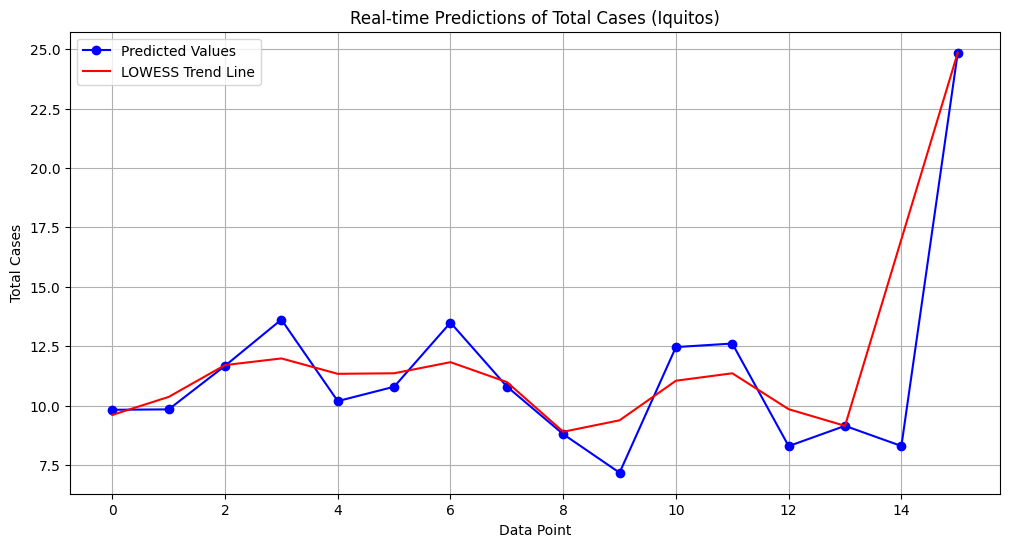

In [199]:
plt.figure(figsize=(12, 6))
plt.plot(realtime_predictions, label='Predicted Values', color='blue', marker='o')

lowess = sm.nonparametric.lowess(realtime_predictions, np.arange(len(realtime_predictions)), frac=0.3)

plt.plot(lowess[:, 0], lowess[:, 1], label='LOWESS Trend Line', color='red')

plt.xlabel('Data Point')
plt.ylabel('Total Cases')
plt.title('Real-time Predictions of Total Cases (Iquitos)')
plt.legend()
plt.grid(True)

plt.show()

# Applying Gradient Boosting for SJ

In [ ]:

SJ_X=sj_data.iloc[:,:-3]
SJ_Y=sj_data.iloc[:,-1:]


SJ_X_Train, SJ_X_Test, SJ_Y_Train, SJ_Y_Test = train_test_split(SJ_X, SJ_Y, test_size = 0.2)

scaler = StandardScaler()

scaler.fit(SJ_X_Train)

SJ_X_Train = scaler.transform(SJ_X_Train)
SJ_X_Test = scaler.transform(SJ_X_Test)

In [ ]:
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'squared_error'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(SJ_X_Train, SJ_Y_Train)
SJ_Predicted_Gradient_Boosting = clf.predict(SJ_X_Test)

SJ_result_MSE_Gradient_Boosting = math.sqrt(mean_squared_error(SJ_Y_Test, SJ_Predicted_Gradient_Boosting))
SJ_result_MAE_Gradient_Boosting = mean_absolute_error(SJ_Y_Test, SJ_Predicted_Gradient_Boosting)

SJ_result_MAE_Gradient_Boosting, SJ_result_MSE_Gradient_Boosting

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


(11.935889174634184, 18.950640606896865)

In [ ]:
params = {'n_estimators': 500, 'max_depth': 5, 'min_samples_split': 3,
          'learning_rate': 0.01, 'loss': 'squared_error'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(SJ_X_Train, SJ_Y_Train)
SJ_Predicted_Gradient_Boosting = clf.predict(SJ_X_Test)

SJ_result_MSE_Gradient_Boosting = math.sqrt(mean_squared_error(SJ_Y_Test, SJ_Predicted_Gradient_Boosting))
SJ_result_MAE_Gradient_Boosting = mean_absolute_error(SJ_Y_Test, SJ_Predicted_Gradient_Boosting)

SJ_result_MAE_Gradient_Boosting, SJ_result_MSE_Gradient_Boosting

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


(11.96745666498261, 20.030352648411682)

In [ ]:
params = {'n_estimators': 500, 'max_depth': 5, 'min_samples_split': 3,
          'learning_rate': 0.01, 'loss': 'absolute_error'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(SJ_X_Train, SJ_Y_Train)
SJ_Predicted_Gradient_Boosting = clf.predict(SJ_X_Test)

SJ_result_MSE_Gradient_Boosting = math.sqrt(mean_squared_error(SJ_Y_Test, SJ_Predicted_Gradient_Boosting))
SJ_result_MAE_Gradient_Boosting = mean_absolute_error(SJ_Y_Test, SJ_Predicted_Gradient_Boosting)

SJ_result_MAE_Gradient_Boosting, SJ_result_MSE_Gradient_Boosting

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


(11.371660631335631, 25.816159537997002)

In [ ]:
params = {'n_estimators': 500, 'max_depth': 5, 'min_samples_split': 3,
          'learning_rate': 0.01, 'loss': 'absolute_error', 'criterion':'friedman_mse'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(SJ_X_Train, SJ_Y_Train)
SJ_Predicted_Gradient_Boosting = clf.predict(SJ_X_Test)

SJ_result_MSE_Gradient_Boosting = math.sqrt(mean_squared_error(SJ_Y_Test, SJ_Predicted_Gradient_Boosting))
SJ_result_MAE_Gradient_Boosting = mean_absolute_error(SJ_Y_Test, SJ_Predicted_Gradient_Boosting)

SJ_result_MAE_Gradient_Boosting, SJ_result_MSE_Gradient_Boosting

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


(11.40661356871303, 25.391910302150027)

# Applying XGB for SJ

In [178]:
SJ_X=sj_data.iloc[:,:-3]
SJ_Y=sj_data.iloc[:,-1:]

In [ ]:
from sklearn.model_selection import GridSearchCV

SJ_X=sj_data.iloc[:,:-3]
SJ_Y=sj_data.iloc[:,-1:]


SJ_X_Train, SJ_X_Test, SJ_Y_Train, SJ_Y_Test = train_test_split(SJ_X, SJ_Y, test_size = 0.2)

scaler = StandardScaler()

scaler.fit(SJ_X_Train)

SJ_X_Train = scaler.transform(SJ_X_Train)
SJ_X_Test = scaler.transform(SJ_X_Test)

param_grid = {
    'max_depth': [6, 8, 10],
    'learning_rate': [0.01, 0.005],
    'subsample': [0.6, 0.7, 0.8],
    'colsample_bytree': [0.6, 0.7],
    'gamma': [0.2, 0.3, 0.4],
    'reg_alpha': [0.1, 0.5],
    'reg_lambda': [1, 2, 3]
}

grid_search = GridSearchCV(
    estimator=XGBRegressor(n_estimators=1000, random_state=42),
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=1
)

# Perform grid search to find the best parameters
grid_search.fit(SJ_X_Train, SJ_Y_Train)

print(f"Best params: {grid_search.best_params_}")


Fitting 5 folds for each of 648 candidates, totalling 3240 fits
Best params: {'colsample_bytree': 0.7, 'gamma': 0.3, 'learning_rate': 0.01, 'max_depth': 6, 'reg_alpha': 0.1, 'reg_lambda': 2, 'subsample': 0.8}


In [179]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

X_train, X_val, y_train, y_val = train_test_split(SJ_X, SJ_Y, test_size=0.2, random_state=42)

dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

params = {
    'objective': 'reg:squarederror',
    'learning_rate': 0.01,
    'max_depth': 6,
    'subsample': 0.8,
    'colsample_bytree': 0.7,
    'gamma': 0.3,
    'reg_alpha': 0.1,
    'reg_lambda': 2,
    'eval_metric': 'rmse',
    'seed': 42
}

evals = [(dtrain, 'train'), (dval, 'eval')]

model_SJ = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=2000,
    evals=evals,
    early_stopping_rounds=50,
    verbose_eval=10
)

# Predict and evaluate the performance
y_pred = model_SJ.predict(dval)

# Evaluation metrics
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")


[0]	train-rmse:52.84453	eval-rmse:43.79192
[10]	train-rmse:50.35101	eval-rmse:42.44723
[20]	train-rmse:47.51545	eval-rmse:41.18058
[30]	train-rmse:44.91807	eval-rmse:39.94736
[40]	train-rmse:43.07910	eval-rmse:39.27205
[50]	train-rmse:40.72664	eval-rmse:38.06837
[60]	train-rmse:38.87255	eval-rmse:37.33005
[70]	train-rmse:37.14189	eval-rmse:36.46868
[80]	train-rmse:35.05617	eval-rmse:35.39204
[90]	train-rmse:33.61034	eval-rmse:34.76766
[100]	train-rmse:32.13932	eval-rmse:34.10033
[110]	train-rmse:30.64653	eval-rmse:33.46291
[120]	train-rmse:29.01769	eval-rmse:32.47123
[130]	train-rmse:27.88492	eval-rmse:31.87557
[140]	train-rmse:26.78987	eval-rmse:31.43478
[150]	train-rmse:25.58463	eval-rmse:30.79889
[160]	train-rmse:24.47373	eval-rmse:30.19166
[170]	train-rmse:23.42709	eval-rmse:29.74047
[180]	train-rmse:22.56040	eval-rmse:29.39190
[190]	train-rmse:21.65802	eval-rmse:29.00211
[200]	train-rmse:20.83832	eval-rmse:28.53566
[210]	train-rmse:20.06143	eval-rmse:28.17560
[220]	train-rmse:19.3

# Realtime API Fetch and Predicting SJ

In [180]:

import requests
import sys

import csv
import codecs
import pandas as pd


response = requests.request("GET", "https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/san%20juan?unitGroup=metric&include=days&key=BLFLYSFR6ZD7GZTSNY7UBQWQU&contentType=csv")
if response.status_code!=200:
  print('Unexpected Status code: ', response.status_code)
  sys.exit()

# Parse the results as CSV
CSVText = csv.reader(response.text.splitlines(), delimiter=',',quotechar='"')


from io import StringIO
data = StringIO(response.text)
df_SJ_Realtime = pd.read_csv(data)


recovery = df_SJ_Realtime
recovery

df_SJ_Realtime['datetime'] = pd.to_datetime(df_SJ_Realtime['datetime'])
df_SJ_Realtime['week_of_year'] = df_SJ_Realtime['datetime'].dt.isocalendar().week
df_SJ_Realtime['year'] = df_SJ_Realtime['datetime'].dt.year

drop_columns = ['name', 'datetime','feelslikemax','feellikemin','feelslike','precipprob',
                'preciptype','snow','snowdepth','windgust','winddir','sealevelpressure','cloudcover','visibility',
                'solarradiation','solarenergy','uvindex','severerisk','conditions','icon','stations',
                'sunrise','feelslikemin', 'precipcover' , 'windspeed','sunset','moonphase', 'description']

df_SJ_Realtime = df_SJ_Realtime.drop(columns=drop_columns, errors='ignore')


df_SJ_Realtime = df_SJ_Realtime.rename(columns={'tempmin': 'station_min_temp_c'})
df_SJ_Realtime = df_SJ_Realtime.rename(columns={'temp': 'station_avg_temp_c'})
df_SJ_Realtime = df_SJ_Realtime.rename(columns={'precip': 'station_precip_mm'})
df_SJ_Realtime = df_SJ_Realtime.rename(columns={'dew': 'reanalysis_dew_point_temp_k'})
df_SJ_Realtime = df_SJ_Realtime.rename(columns={'humidity': 'reanalysis_specific_humidity_g_per_kg'})
df_SJ_Realtime = df_SJ_Realtime.rename(columns={'tempmax': 'station_max_temp_c'})


In [183]:
df_SJ_Realtime = df_SJ_Realtime.rename(columns={'week_of_year': 'weekofyear'})


In [184]:
df_SJ_Realtime['weekofyear'] = df_SJ_Realtime['weekofyear'].iloc[0] + np.arange(len(realtime_df))


In [186]:
c = ["reanalysis_dew_point_temp_k"]

for i in c:
    df_SJ_Realtime[i] = df_SJ_Realtime[i] + 273.15

In [187]:
realtime_features = df_SJ_Realtime[['year','weekofyear' ,'reanalysis_dew_point_temp_k' , 'reanalysis_specific_humidity_g_per_kg'
                                 , 'station_avg_temp_c', 'station_max_temp_c' , 'station_min_temp_c' , 'station_precip_mm' ]]

realtime_dmatrix_SJ = xgb.DMatrix(realtime_features)

realtime_predictions_SJ = model_SJ.predict(realtime_dmatrix_SJ)

print(realtime_predictions_SJ)

[53.296787 54.07028  66.193985 59.45638  52.80688  54.552994 60.378937
 63.632576 57.403072 57.326916 48.36392  49.868973 61.0897   59.44882
 64.29459  45.23182 ]


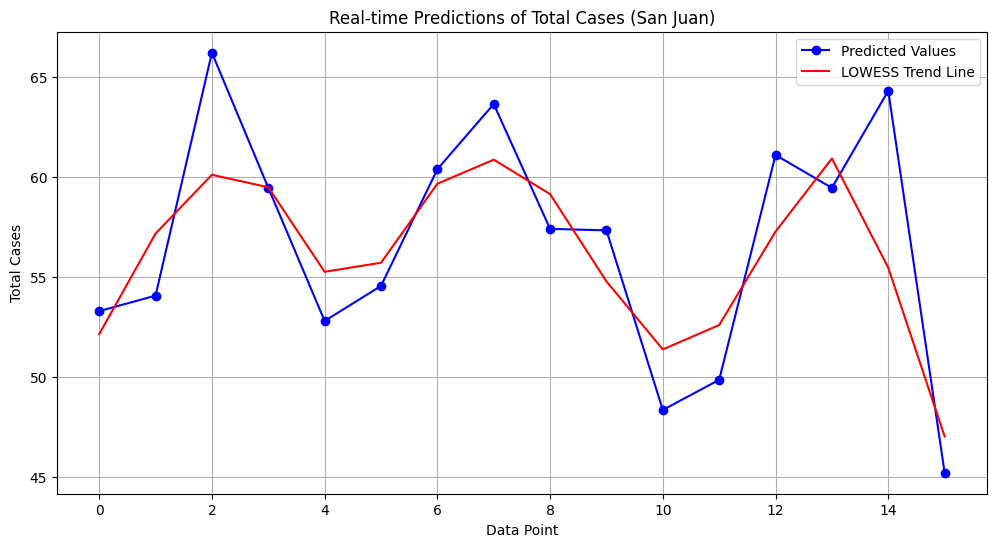

In [203]:
plt.figure(figsize=(12, 6))
plt.plot(realtime_predictions_SJ, label='Predicted Values', color='blue', marker='o')

lowess = sm.nonparametric.lowess(realtime_predictions_SJ, np.arange(len(realtime_predictions)), frac=0.25)

plt.plot(lowess[:, 0], lowess[:, 1], label='LOWESS Trend Line', color='red')

plt.xlabel('Data Point')
plt.ylabel('Total Cases')
plt.title('Real-time Predictions of Total Cases (San Juan)')
plt.legend()
plt.grid(True)

plt.show()